<a href="https://colab.research.google.com/github/RaymondPTrain/ml/blob/master/pytorch_Mela2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Based on and derived from this pytorch tutorial:

Writing Custom Datasets, DataLoaders and Transforms
Author: Sasank Chilamkurthy <https://chsasank.github.io>_

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%matplotlib inline



To run this tutorial, please make sure the following packages are
installed:

-  ``scikit-image``: For image io and transforms
-  ``pandas``: For easier csv parsing




In [3]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from os import walk

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

Confirm the files are accessible.




In [4]:
from os import walk
mypath = '/content/drive/My Drive/MelanomaDetection/unlabeled'
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break

In [5]:
len(filenames)

7018

Dataset class
-------------

``torch.utils.data.Dataset`` is an abstract class representing a
dataset.
Add new class based on this class.

-  ``__len__`` so that ``len(dataset)`` returns the size of the dataset.
-  ``__getitem__`` to support the indexing such that ``dataset[i]`` can
   be used to get $i$\ th sample






In [6]:
class MelanomaDataset(Dataset):

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        
        f = []
        for (dirpath, dirnames, filenames) in walk(root_dir):
          f.extend(filenames)
          break
        self.dframe = pd.DataFrame (f,columns=['image_name'])
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dframe)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.dframe.iloc[idx, 0])
        file_name = self.dframe.iloc[idx, 0]
        image = io.imread(img_name)
        sample = {'image': image, 'imgName': file_name}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [7]:
x_dataset = MelanomaDataset( '/content/drive/My Drive/MelanomaDetection/unlabeled')

In [8]:
print(len(x_dataset))
s = x_dataset[27]


7018


In [9]:
s

{'image': array([[[101,  75, 100],
         [120,  96, 122],
         [139, 116, 144],
         ...,
         [173, 147, 192],
         [167, 141, 188],
         [159, 133, 180]],
 
        [[117,  93, 117],
         [133, 109, 135],
         [149, 126, 154],
         ...,
         [177, 154, 198],
         [173, 147, 192],
         [166, 140, 187]],
 
        [[135, 112, 138],
         [147, 124, 150],
         [156, 136, 163],
         ...,
         [185, 162, 204],
         [180, 157, 201],
         [173, 150, 194]],
 
        ...,
 
        [[170, 137, 182],
         [173, 140, 185],
         [178, 145, 190],
         ...,
         [175, 144, 186],
         [172, 141, 183],
         [171, 140, 182]],
 
        [[163, 130, 175],
         [167, 134, 179],
         [172, 141, 185],
         ...,
         [175, 144, 185],
         [171, 139, 180],
         [168, 136, 177]],
 
        [[155, 122, 167],
         [159, 126, 171],
         [165, 134, 178],
         ...,
         [176, 144,

Let's instantiate this class and iterate through the data samples. 




In [73]:
x_dataset

0 (32, 32, 3) 5172.jpg


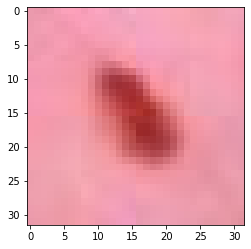

1 (32, 32, 3) 3012.jpg


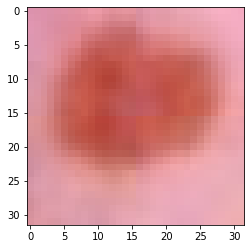

2 (32, 32, 3) 4750.jpg


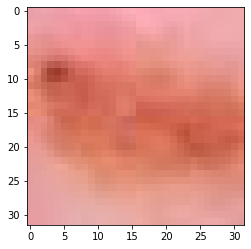

3 (32, 32, 3) 5580.jpg


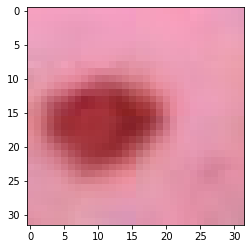

4 (32, 32, 3) 3922.jpg


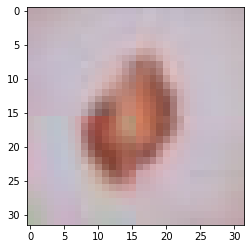

5 (32, 32, 3) 3612.jpg


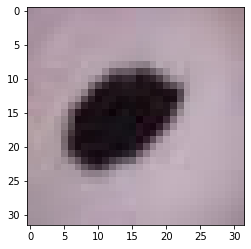

6 (32, 32, 3) 871.jpg


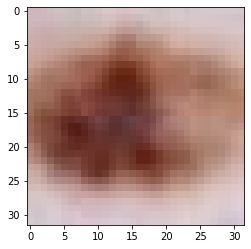

7 (32, 32, 3) 1909.jpg


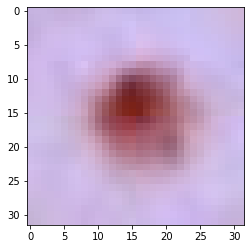

8 (32, 32, 3) 3603.jpg


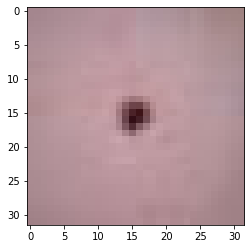

9 (32, 32, 3) 4804.jpg


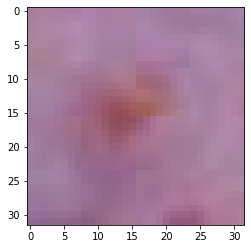

10 (32, 32, 3) 653.jpg


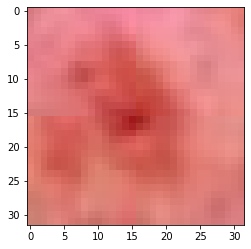

11 (32, 32, 3) 2103.jpg


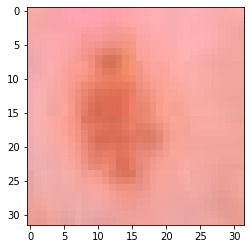

In [10]:
for i in range(len(x_dataset)):
    sample = x_dataset[i+100]
    print(i, sample['image'].shape,sample['imgName'])
    plt.imshow(sample['image'])
    plt.show()
    if i > 10:
      break

In [12]:
class MelanomaDatasetLabeled(Dataset):

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        
        f = []
        for (dirpath, dirnames, filenames) in walk(root_dir):
          f.extend(filenames)
          break
        self.dframe = pd.DataFrame (f,columns=['image_name'])
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dframe)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.dframe.iloc[idx, 0])
        file_name = self.dframe.iloc[idx, 0]
        dLabel = file_name.split(".",1)[0].split("_")[1]
        image = io.imread(img_name)

        sample = {'image': image,  'imgName': file_name, 'label':dLabel}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [13]:
y_dataset = MelanomaDatasetLabeled( '/content/drive/My Drive/MelanomaDetection/labeled')

In [62]:
print(len(y_dataset))
s = y_dataset[27]

200


In [63]:
s

{'image': array([[[191, 124, 133],
         [199, 132, 141],
         [208, 141, 148],
         ...,
         [197, 131, 133],
         [201, 135, 137],
         [204, 138, 140]],
 
        [[186, 121, 129],
         [197, 132, 138],
         [208, 143, 149],
         ...,
         [200, 134, 136],
         [203, 137, 139],
         [205, 139, 141]],
 
        [[180, 115, 121],
         [193, 128, 134],
         [204, 139, 143],
         ...,
         [203, 137, 138],
         [205, 139, 141],
         [205, 139, 141]],
 
        ...,
 
        [[195, 133, 134],
         [197, 135, 136],
         [199, 137, 140],
         ...,
         [183, 106, 112],
         [183, 107, 111],
         [190, 114, 118]],
 
        [[195, 133, 134],
         [193, 131, 132],
         [192, 130, 133],
         ...,
         [182, 107, 114],
         [183, 106, 114],
         [192, 115, 121]],
 
        [[194, 132, 133],
         [190, 128, 129],
         [185, 123, 126],
         ...,
         [183, 108,

0 (32, 32, 3) 49_1.jpg 1


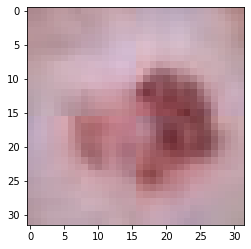

1 (32, 32, 3) 11_0.jpg 0


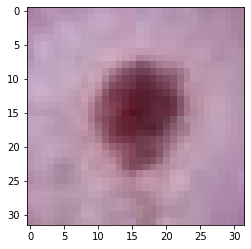

2 (32, 32, 3) 190_1.jpg 1


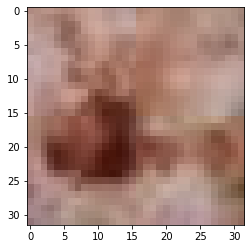

3 (32, 32, 3) 124_0.jpg 0


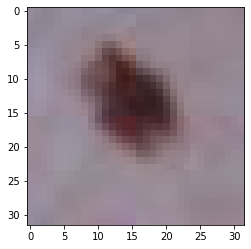

4 (32, 32, 3) 22_0.jpg 0


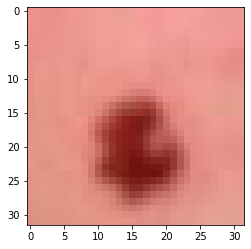

5 (32, 32, 3) 8_1.jpg 1


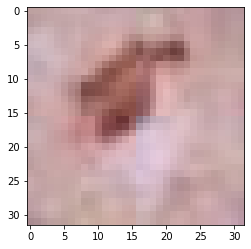

6 (32, 32, 3) 99_0.jpg 0


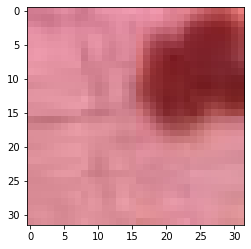

7 (32, 32, 3) 104_1.jpg 1


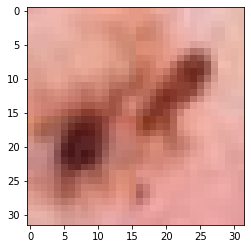

8 (32, 32, 3) 57_0.jpg 0


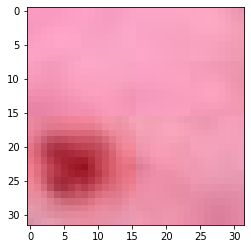

9 (32, 32, 3) 79_0.jpg 0


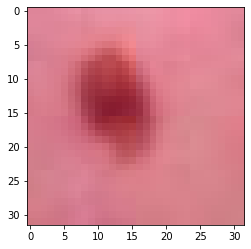

10 (32, 32, 3) 103_1.jpg 1


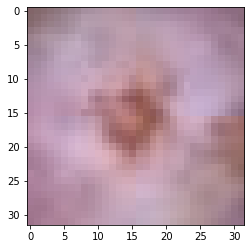

11 (32, 32, 3) 35_1.jpg 1


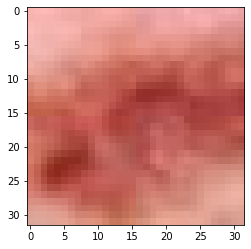

In [14]:
for i in range(len(y_dataset)):
    sample = y_dataset[i+100]
    print(i, sample['image'].shape,sample['imgName'],sample['label'])
    plt.imshow(sample['image'])
    plt.show()
    if i > 10:
      break

Transforms
----------

Let's create three transforms:

-  ``Rescale``: to scale the image
-  ``RandomCrop``: to crop from image randomly. This is data
   augmentation.
-  ``ToTensor``: to convert the numpy images to torch images (we need to
   swap axes).

We will write them as callable classes instead of simple functions so
that parameters of the transform need not be passed everytime it's
called. For this, we just need to implement ``__call__`` method and
if required, ``__init__`` method. We can then use a transform like this:

::

    tsfm = Transform(params)
    transformed_sample = tsfm(sample)


    These transforms are similar to those in the base tutorial.  But are tailored for this new class.


In [17]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image = sample['image']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))


        return {'image': img, 'imgName': sample['imgName']}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image = sample['image']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]


        return {'image': image, 'imgName': sample['imgName']}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image= sample['image']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image), 'imgName': sample['imgName']}

Iterating through the dataset
-----------------------------





In [18]:
transformed_dataset = MelanomaDataset(root_dir='/content/drive/My Drive/MelanomaDetection/unlabeled',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['imgName'])

    if i == 3:
        break

0 torch.Size([3, 224, 224]) 4775.jpg
1 torch.Size([3, 224, 224]) 6016.jpg
2 torch.Size([3, 224, 224]) 595.jpg
3 torch.Size([3, 224, 224]) 2454.jpg


However, we are losing a lot of features by using a simple ``for`` loop to
iterate over the data. In particular, we are missing out on:

-  Batching the data
-  Shuffling the data
-  Load the data in parallel using ``multiprocessing`` workers.

``torch.utils.data.DataLoader`` is an iterator which provides all these
features. Parameters used below should be clear. One parameter of
interest is ``collate_fn``. You can specify how exactly the samples need
to be batched using ``collate_fn``. However, default collate should work
fine for most use cases.




In [22]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)


# Helper function to show a batch
def show_Mel_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch = sample_batched['image']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size() )

    if i_batch == 3:
        break

0 torch.Size([4, 3, 224, 224])
1 torch.Size([4, 3, 224, 224])
2 torch.Size([4, 3, 224, 224])
3 torch.Size([4, 3, 224, 224])
